# Appendix B.2 - Linear Algebra

Linear algebra is the branch of mathematics that studies **vector spaces** and **linear transformations** between vector spaces, such as rotating a shape, scaling it up or down, translating it (ie. moving it), etc. A reference guide can be found [here](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf). 

## Vectors
A vector is a quantity defined by a magnitude and a direction, it can be represented by an array of numbers called **scalars**, each scalar corresponds to the magnitude of the vector with regards to each dimension.

By convention vectors are generally presented in the form of columns. Also, vector names are generally lowercase to distinguish them from matrices and in bold to distinguish them from simple scalar values.

A list of N numbers may also represent the coordinates of a point in an N-dimensional space, so it is quite frequent to represent vectors as simple points instead of arrows. 

A vector with 1 element may be represented as an arrow or a point on an axis, a vector with 2 elements is an arrow or a point on a plane, a vector with 3 elements is an arrow or point in space, and a vector with N elements is an arrow or a point in an N-dimensional space. 

In python, a vector can be represented in many ways, the simplest being a regular python list of numbers:

In [1]:
[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

It is much better to use NumPy's **ndarray**, which provides a lot of convenient and optimized implementations of essential mathematical operations on vectors. For example:

In [2]:
import numpy as np

vector = np.array([10.5, 5.2, 3.25, 7.0])

print('array:', vector)
print('size:', vector.size)
print('element i:', vector[2])

array: [10.5   5.2   3.25  7.  ]
size: 4
element i: 3.25


To plot vectors we can use **MatPlotLib**. For example:

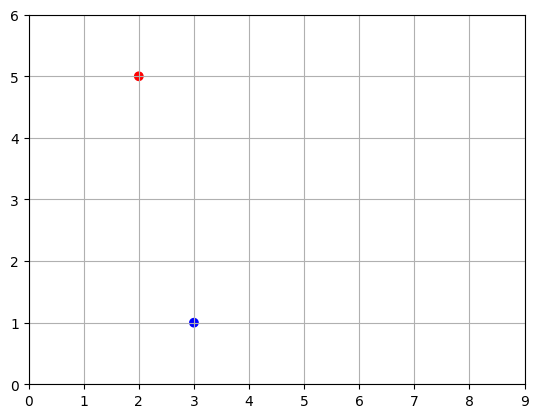

In [3]:
import matplotlib.pyplot as plt

u = np.array([2, 5])
v = np.array([3, 1])

x_coords, y_coords = zip(u, v)

plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()


Vectors can also be represented as arrows.

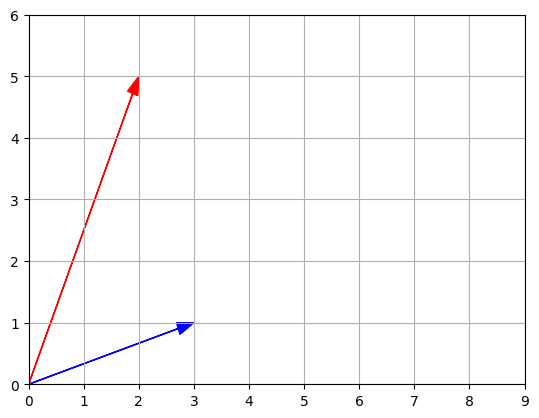

In [4]:
def plot_vector_2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

plot_vector_2d(u, color="r")
plot_vector_2d(v, color="b")

plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

Plotting 3D vectors is also relatively straightforward, using **Axes3D** from MatPlotLib.

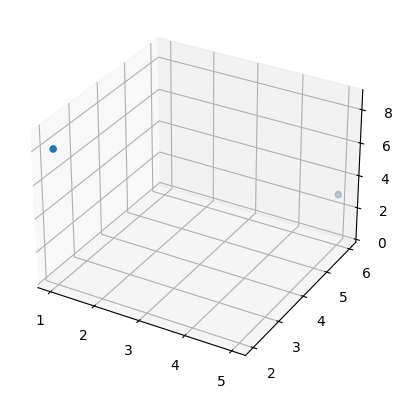

In [5]:
from mpl_toolkits.mplot3d import Axes3D

a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

It is a bit hard to visualize exactly where in space points are, so let's add vertical lines.

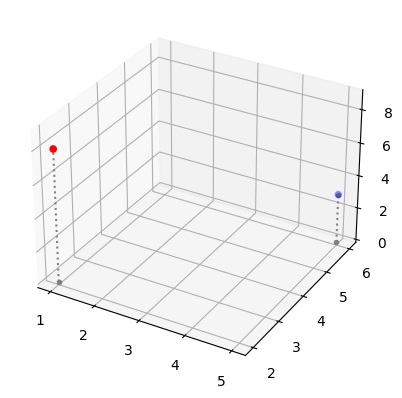

In [6]:
def plot_vectors_3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors_3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

### Norm
The norm of a vector $\textbf{u}$, noted $\left \Vert \textbf{u} \right \|$, is a measure of the length (magnitude) of $\textbf{u}$. There are multiple possible norms, but the most common one is the Euclidian norm, which is defined as:

$\displaystyle \left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

NumPy's has the norm function, available in the **linalg** (Linear Algebra) module.

However, it is much more efficient to use NumPy's `norm` function, available in the `linalg` (**Lin**ear **Alg**ebra) module:

In [7]:
import numpy.linalg as la

la.norm(u)

5.385164807134504

### Addition
Vectors of same size can be added together. Addition is performed **elementwise**:

In [8]:
print('u:',u)
print('v:', v)
print('u+v:', u + v)

u: [2 5]
v: [3 1]
u+v: [5 6]


Let's look at what vector addition looks like graphically:

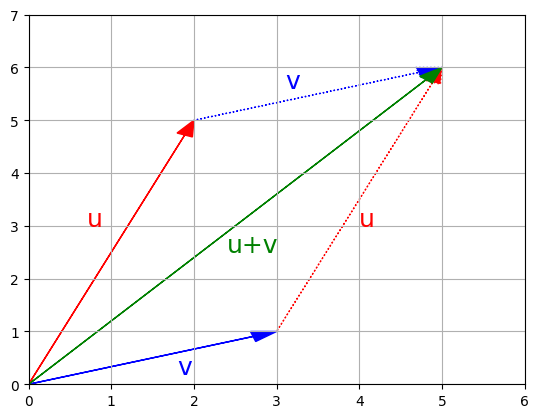

In [9]:
plot_vector_2d(u, color="r")
plot_vector_2d(v, color="b")
plot_vector_2d(v, origin=u, color="b", linestyle="dotted")
plot_vector_2d(u, origin=v, color="r", linestyle="dotted")
plot_vector_2d(u+v, color="g")

plt.axis([0, 6, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()

Vector addition is **commutative**, meaning that $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$.

Vector addition is also **associative**, meaning that $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$.

If you have a shape defined by a number of points (vectors), and you add a vector $\textbf{v}$ to all of these points, then the whole shape gets shifted by $\textbf{v}$. This is called a **geometric translation**

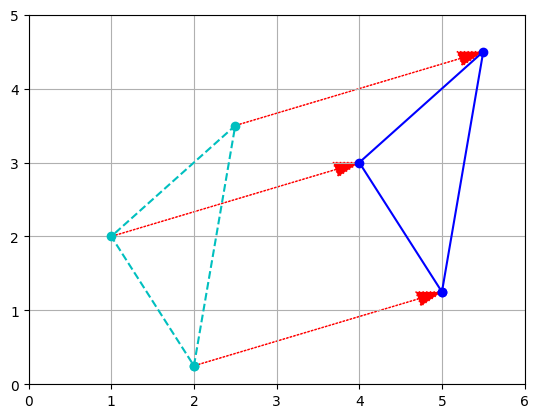

In [10]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector_2d(v, t1, color="r", linestyle=":")
plot_vector_2d(v, t2, color="r", linestyle=":")
plot_vector_2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.axis([0, 6, 0, 5])
plt.grid()
plt.show()

Substracting a vector is like adding the opposite vector.

### Multiplication by a scalar
Vectors can be multiplied by scalars. All elements in the vector are multiplied by that number.

In [11]:
print("1.5 *", u, "=", 1.5 * u)

1.5 * [2 5] = [3.  7.5]


Graphically, scalar multiplication results in changing the scale of a figure, hence the name "scalar". For example, let's scale up by a factor of 2.5

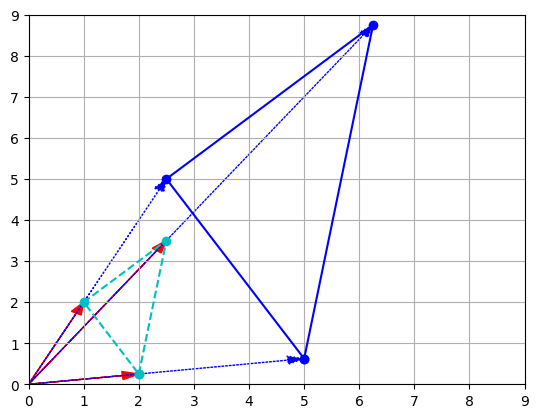

In [12]:
k = 2.5

t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector_2d(t1, color="r")
plot_vector_2d(t2, color="r")
plot_vector_2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector_2d(k * t1, color="b", linestyle=":")
plot_vector_2d(k * t2, color="b", linestyle=":")
plot_vector_2d(k * t3, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.grid()
plt.show()

As you might guess, dividing a vector by a scalar is equivalent to multiplying by its multiplicative inverse (reciprocal):

$\displaystyle \dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$

Scalar multiplication is **commutative**: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

It is also **associative**: $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.

Finally, it is **distributive** over addition of vectors: $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$.

### Zero Unit and Normalized vectors

A **zero-vector** is a vector full of 0s.

A **unit vector** is a vector with a norm equal to 1.

The **normalized vector** of a non-null vector $\textbf{u}$, noted $\hat{\textbf{u}}$, is the unit vector that points in the same direction as $\textbf{u}$. It is equal to: 

$\displaystyle \hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$

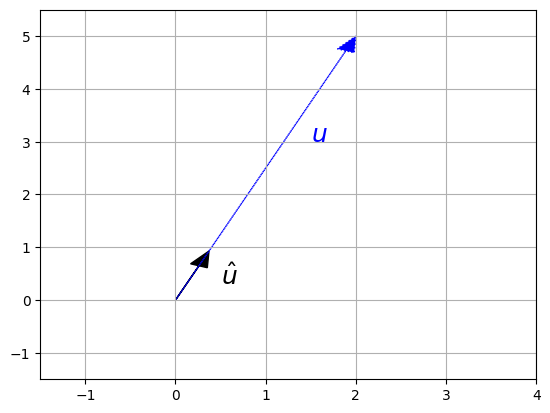

In [13]:
u = np.array([2, 5])
u_cap = u / la.norm(u)

plot_vector_2d(u_cap, color="k")
plot_vector_2d(u, color="b", linestyle=":")
plt.text(0.5, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(1.5, 3, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 4, -1.5, 5.5])
plt.grid()
plt.show()

### Dot product
The **dot product** (also called **scalar product** or **inner product**) of two vectors $\textbf{u}$ and $\textbf{v}$ is a useful operation that comes up fairly often in linear algebra. It is noted $\textbf{u} \cdot \textbf{v}$, or sometimes $⟨\textbf{u}|\textbf{v}⟩$ or $(\textbf{u}|\textbf{v})$, and it is defined as:

$\displaystyle \textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$.

Another way to calculate the dot product is:

$\displaystyle \textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

NumPy provides the **dot()** function, or equivalently, we can use the **dot()** method of ndarray object.

In [14]:
np.dot(u,v)
u.dot(v)

11

**Caution**, the "*" operator will perform an **elementwise** multiplication and not the dot product

In [15]:
print('u:', u)
print('v:', v)
print('u*v:', u * v)
print('u.u:', u.dot(v))

u: [2 5]
v: [3 1]
u*v: [6 5]
u.u: 11


The dot product is **commutative**: $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.

The dot product is only defined between two vectors, not between a scalar and a vector. This means that we cannot chain dot products: for example, the expression $\textbf{u} \cdot \textbf{v} \cdot \textbf{w}$ is not defined since $\textbf{u} \cdot \textbf{v}$ is a scalar and $\textbf{w}$ is a vector.

This also means that the dot product is **NOT associative**: $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} \neq \textbf{u} \cdot (\textbf{v} \cdot \textbf{w})$ since neither are defined.

However, the dot product is **associative with regards to scalar multiplication**: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$

The dot product is **distributive** over addition of vectors: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v} + \textbf{u} \cdot \textbf{w}$.

### Angle between vectors
One of the many uses of the dot product is to calculate the angle between two non-zero vectors. Looking at the dot product definition, we can deduce the following formula:

$\displaystyle \theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

Note that if $\textbf{u} \cdot \textbf{v} = 0$, it follows that $\theta = \dfrac{\pi}{2}$. In other words, if the dot product of two non-null vectors is zero, it means that they are orthogonal.

Let's use this formula to calculate the angle between $\textbf{u}$ and $\textbf{v}$ (in radians):

In [16]:
def angle(u, v):
    return np.arccos(np.clip(u.dot(v) / la.norm(u) / la.norm(v), -1, 1))

theta = angle(u, v)
print("Angle:", theta, "radians")
print("     :", theta * 180 / np.pi, "degrees")

Angle: 0.8685393952858895 radians
     : 49.76364169072618 degrees


due to small floating point errors, the argument of arcos may be very slightly outside of the $[-1, 1]$ interval, which would make `arccos` fail. This is why we clipped the value within the range, using NumPy's **clip()** function.

### Projecting a point onto an axis
The dot product is also very useful to project points onto an axis. The projection of vector $\textbf{v}$ onto $\textbf{u}$'s axis is given by this formula:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$


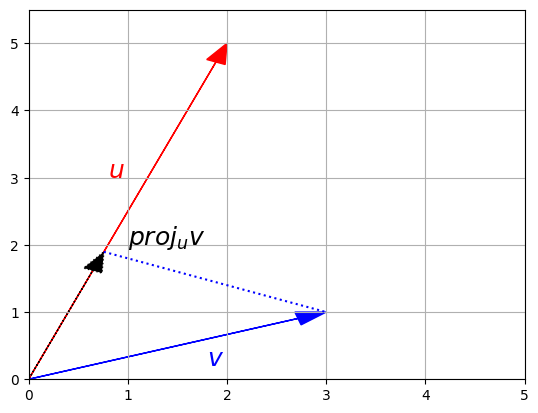

In [17]:
u_normalized = u / la.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector_2d(u, color="r")
plot_vector_2d(v, color="b")

plot_vector_2d(proj, color="k", linestyle=":")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 5, 0, 5.5])
plt.grid()
plt.show()

## Matrices
A matrix is a rectangular array of scalars (ie. any number: integer, real or complex) arranged in rows and columns, for example:

$\begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \end{bmatrix}$

You can also think of a matrix as a list of vectors.

Matrices are convenient and very efficient to run operations on many vectors at a time. They are great at representing and performing linear transformations such rotations, translations and scaling.

By convention matrices generally have uppercase names, such as $A$.

In python, a matrix can be represented in various ways. The simplest is just a list of python lists:

In [18]:
A = [
        [10, 20, 30],
        [40, 50, 60]
    ]
print(A)

[[10, 20, 30], [40, 50, 60]]


A much more efficient way is to use the NumPy library which provides optimized implementations of many matrix operations:

In [19]:
A = np.array([
    [10,20,30],
    [40,50,60]
])
print(A)

[[10 20 30]
 [40 50 60]]


### Size
The size of a matrix is defined by its number of rows and number of columns. It is noted $rows \times columns$. For example, the matrix $A$ above is an example of a $2 \times 3$ matrix: 2 rows, 3 columns. 

To get a matrix's size in NumPy you need to refer to its **shape**, the **size** represent the number of element.

In [20]:
shape = A.shape
size = A.size

print(shape)
print(size)

(2, 3)
6


### Element indexing
The number located in the $i^{th}$ row, and $j^{th}$ column of a matrix $X$ is sometimes noted $X_{i,j}$, but there is no standard notation.

$X = \begin{bmatrix}
  x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n}\\
  x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n}\\
  x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n}\\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  x_{m,1} & x_{m,2} & x_{m,3} & \cdots & x_{m,n}\\
\end{bmatrix}$

Note that in math indices generally start at 1, but in programming they usually start at 0. So to access $A_{2,3}$ programmatically, we need to write this:

In [21]:
A[1,2]  # 2nd row, 3rd column

60

The $i^{th}$ row vector is sometimes noted $M_{i,*}$, but again there is no standard notation. For example, to access $A_{2,*}$ (ie. $A$'s 2nd row vector):

In [22]:
A[1, :]  # 2nd row vector (as a 1D array)

array([40, 50, 60])

Similarly, the $j^{th}$ column vector is sometimes noted $M_{*,j}$. For example, to access $A_{*,3}$ (ie. $A$'s 3rd column vector):

In [23]:
A[:, 2]  # 3rd column vector (as a 1D array)

array([30, 60])

Note that the result is actually a one-dimensional NumPy array: there is no such thing as a *vertical* or *horizontal* one-dimensional array. If you need to actually represent a row vector as a one-row matrix (ie. a 2D NumPy array), or a column vector as a one-column matrix, then you need to use a slice instead of an integer when accessing the row or column, for example:

In [24]:
A[1:2, :]  # rows 2 to 3 (excluded): this returns row 2 as a one-row matrix

array([[40, 50, 60]])

In [25]:
A[:, 2:3]  # columns 3 to 4 (excluded): this returns column 3 as a one-column matrix

array([[30],
       [60]])

### Square Triangular Diagonal and Identity matrices
A **square matrix** is a matrix that has the same number of rows and columns, for example a $3 \times 3$ matrix:

$\begin{bmatrix}
  4 & 9 & 2 \\
  3 & 5 & 7 \\
  8 & 1 & 6
\end{bmatrix}$

An **upper triangular matrix** is a special kind of square matrix where all the elements *below* the main diagonal (top-left to bottom-right) are zero, for example:

$\begin{bmatrix}
  4 & 9 & 2 \\
  0 & 5 & 7 \\
  0 & 0 & 6
\end{bmatrix}$

Similarly, a **lower triangular matrix** is a square matrix where all elements *above* the main diagonal are zero, for example:

$\begin{bmatrix}
  4 & 0 & 0 \\
  3 & 5 & 0 \\
  8 & 1 & 6
\end{bmatrix}$

A **triangular matrix** is one that is either lower triangular or upper triangular.

A matrix that is both upper and lower triangular is called a **diagonal matrix**, for example:

$\begin{bmatrix}
  4 & 0 & 0 \\
  0 & 5 & 0 \\
  0 & 0 & 6
\end{bmatrix}$

You can construct a diagonal matrix using NumPy's **diag()** function:

In [26]:
np.diag([4, 5, 6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

If you pass a matrix to the diag() function, it will happily extract the diagonal values:

In [27]:
D = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ])
D_diag = np.diag(D)
print(D_diag)

[1 5 9]


The **identity matrix** of size $n$, noted $I_n$, is a diagonal matrix of size $n \times n$ with $1$'s in the main diagonal, for example $I_3$:

$\begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{bmatrix}$

Numpy's **eye()** function returns the identity matrix of the desired size:

In [28]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

The identity matrix is often noted simply $I$ (instead of $I_n$) when its size is clear given the context. It is called the *identity* matrix because multiplying a matrix with it leaves the matrix unchanged.

### Adding matrices
If two matrices $Q$ and $R$ have the same size $m \times n$, they can be added together. Addition is performed elementwise: the result is also a $m \times n$ matrix $S$ where each element is the sum of the elements at the corresponding position: $S_{i,j} = Q_{i,j} + R_{i,j}$

$S =
\begin{bmatrix}
  Q_{11} + R_{11} & Q_{12} + R_{12} & Q_{13} + R_{13} & \cdots & Q_{1n} + R_{1n} \\
  Q_{21} + R_{21} & Q_{22} + R_{22} & Q_{23} + R_{23} & \cdots & Q_{2n} + R_{2n}  \\
  Q_{31} + R_{31} & Q_{32} + R_{32} & Q_{33} + R_{33} & \cdots & Q_{3n} + R_{3n}  \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  Q_{m1} + R_{m1} & Q_{m2} + R_{m2} & Q_{m3} + R_{m3} & \cdots & Q_{mn} + R_{mn}  \\
\end{bmatrix}$

For example, let's create a $2 \times 3$ matrix $B$ and compute $A + B$:

In [29]:
A = np.array([[10,20,30],[40,50,60]])
B = np.array([[1,2,3], [4, 5, 6]])
D = A + B
print(D)

[[11 22 33]
 [44 55 66]]


**Addition is *commutative***, meaning that $A + B = B + A$:

In [30]:
print(B + A)

[[11 22 33]
 [44 55 66]]


**It is also *associative***, meaning that $A + (B + C) = (A + B) + C$:

In [31]:
C = np.array([[100,200,300], [400, 500, 600]])

print(A + (B + C))
print((A + B) + C)

[[111 222 333]
 [444 555 666]]
[[111 222 333]
 [444 555 666]]


### Scalar multiplication
A matrix $M$ can be multiplied by a scalar $\lambda$. The result is noted $\lambda M$, and it is a matrix of the same size as $M$ with all elements multiplied by $\lambda$:

$\lambda M =
\begin{bmatrix}
  \lambda \times M_{11} & \lambda \times M_{12} & \lambda \times M_{13} & \cdots & \lambda \times M_{1n} \\
  \lambda \times M_{21} & \lambda \times M_{22} & \lambda \times M_{23} & \cdots & \lambda \times M_{2n} \\
  \lambda \times M_{31} & \lambda \times M_{32} & \lambda \times M_{33} & \cdots & \lambda \times M_{3n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  \lambda \times M_{m1} & \lambda \times M_{m2} & \lambda \times M_{m3} & \cdots & \lambda \times M_{mn} \\
\end{bmatrix}$

Scalar multiplication is also defined on the right hand side, and gives the same result: $M \lambda = \lambda M$. This makes scalar multiplication **commutative**.

In NumPy, simply use the `*` operator to multiply a matrix by a scalar. For example:

In [32]:
print(2 * A)
print(A * 2)

[[ 20  40  60]
 [ 80 100 120]]
[[ 20  40  60]
 [ 80 100 120]]


It is also **associative**, meaning that $\alpha (\beta M) = (\alpha \times \beta) M$, where $\alpha$ and $\beta$ are scalars. For example:

In [33]:
print(2 * (3 * A))
print((2 * 3) * A)

[[ 60 120 180]
 [240 300 360]]
[[ 60 120 180]
 [240 300 360]]


It is **distributive over addition** of matrices, meaning that $\lambda (Q + R) = \lambda Q + \lambda R$:

In [34]:
print(2 * (A + B))
print(2 * A + 2 * B)

[[ 22  44  66]
 [ 88 110 132]]
[[ 22  44  66]
 [ 88 110 132]]


### Matrix multiplication
A matrix $Q$ of size $m \times n$ can be multiplied by a matrix $R$ of size $n \times q$. It is noted simply $QR$ without multiplication sign or dot. The result $P$ is an $m \times q$ matrix where each element is computed as a sum of products:

$\displaystyle P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}$

The element at position $i,j$ in the resulting matrix is the sum of the products of elements in row $i$ of matrix $Q$ by the elements in column $j$ of matrix $R$.

$\displaystyle P = \begin{bmatrix}
Q_{11} R_{11} + Q_{12} R_{21} + \cdots + Q_{1n} R_{n1} &
    \cdots & Q_{11} R_{1q} + Q_{12} R_{2q} + \cdots + Q_{1n} R_{nq} \\
Q_{21} R_{11} + Q_{22} R_{21} + \cdots + Q_{2n} R_{n1} &
    \cdots & Q_{21} R_{1q} + Q_{22} R_{2q} + \cdots + Q_{2n} R_{nq} \\
  \vdots & \ddots & \vdots \\
Q_{m1} R_{11} + Q_{m2} R_{21} + \cdots + Q_{mn} R_{n1} &
    \cdots & Q_{m1} R_{1q} + Q_{m2} R_{2q} + \cdots + Q_{mn} R_{nq}
\end{bmatrix}$

You may notice that each element $P_{i,j}$ is the dot product of the row vector $Q_{i,*}$ and the column vector $R_{*,j}$:

$P_{i,j} = Q_{i,*} \cdot R_{*,j}$

So we can rewrite $P$ more concisely as:

$P =
\begin{bmatrix}
Q_{1,*} \cdot R_{*,1} & Q_{1,*} \cdot R_{*,2} & \cdots & Q_{1,*} \cdot R_{*,q} \\
Q_{2,*} \cdot R_{*,1} & Q_{2,*} \cdot R_{*,2} & \cdots & Q_{2,*} \cdot R_{*,q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m,*} \cdot R_{*,1} & Q_{m,*} \cdot R_{*,2} & \cdots & Q_{m,*} \cdot R_{*,q}
\end{bmatrix}$

Let's multiply two matrices in NumPy, using **dot()** method:

In [35]:
A = np.array([
              [10,20,30],
              [40,50,60]
            ])
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])

E = A.dot(D)

print(E)

[[ 930 1160 1320 1560]
 [2010 2510 2910 3450]]


Let's check this result by looking at one element, just to be sure: looking at $E_{2,3}$ for example, we need to multiply elements in $A$'s $2^{nd}$ row by elements in $D$'s $3^{rd}$ column, and sum up these products:

In [37]:
print(40*5 + 50*17 + 60*31)
print(E[1,2])

2910
2910


**Matrix multiplication is NOT commutative**: in general $QR \neq RQ$

In fact, $QR$ and $RQ$ are only both defined if $Q$ has size $m \times n$ and $R$ has size $n \times m$. Let's look at an example where both *are* defined and show that they are (in general) *NOT* equal:

In [38]:
A = np.array([
              [10,20,30],
              [40,50,60]
            ])

F = np.array([
        [5,2],
        [4,1],
        [9,3]
    ])

print(A.dot(F))
print(F.dot(A))

[[400 130]
 [940 310]]
[[130 200 270]
 [ 80 130 180]
 [210 330 450]]


On the other hand, **matrix multiplication is associative**, meaning that $Q(RS) = (QR)S$.

In [39]:
G = np.array([
        [8,  7,  4,  2,  5],
        [2,  5,  1,  0,  5],
        [9, 11, 17, 21,  0],
        [0,  1,  0,  1,  2]])

print(A.dot(D).dot(G))     # (AB)G
print(A.dot(D.dot(G)))     # A(BG)

[[21640 28390 27320 31140 13570]
 [47290 62080 60020 68580 29500]]
[[21640 28390 27320 31140 13570]
 [47290 62080 60020 68580 29500]]


It is also **distributive over addition** of matrices, meaning that $(Q + R)S = QS + RS$. For example:

In [40]:
print((A + B).dot(D))
print(A.dot(D) + B.dot(D))

[[1023 1276 1452 1716]
 [2211 2761 3201 3795]]
[[1023 1276 1452 1716]
 [2211 2761 3201 3795]]


The product of a matrix $M$ by the identity matrix (of matching size) results in the same matrix $M$. More formally, if $M$ is an $m \times n$ matrix, then:
$MI = IM = M$

In [41]:
print(A.dot(np.eye(3)))
print(np.eye(2).dot(A))

[[10. 20. 30.]
 [40. 50. 60.]]
[[10. 20. 30.]
 [40. 50. 60.]]


**Caution**: NumPy's * operator performs elementwise multiplication, NOT a matrix multiplication:

In [42]:
print(A * B)   # NOT a matrix multiplication

[[ 10  40  90]
 [160 250 360]]


### Matrix transpose
The transpose of a matrix $M$ is a matrix noted $M^T$ such that the $i^{th}$ row in $M^T$ is equal to the $i^{th}$ column in $M$:

$A^T =
\begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix}^T =
\begin{bmatrix}
  10 & 40 \\
  20 & 50 \\
  30 & 60
\end{bmatrix}$

In other words, ($A^T)_{i,j}$ = $A_{j,i}$

Obviously, if $M$ is an $m \times n$ matrix, then $M^T$ is an $n \times m$ matrix.

In NumPy, a matrix's transpose can be obtained simply using the T attribute:

In [43]:
print(A)
print(A.T)

[[10 20 30]
 [40 50 60]]
[[10 40]
 [20 50]
 [30 60]]


Transposition is **distributive over addition** of matrices, meaning that $(Q + R)^T = Q^T + R^T$

In [44]:
print((A + B).T)
print(A.T + B.T)

[[11 44]
 [22 55]
 [33 66]]
[[11 44]
 [22 55]
 [33 66]]


Moreover, $(Q R)^T = R^T Q^T$. Note that the order is reversed. For example:

In [45]:
print((A.dot(D)).T)
print(D.T.dot(A.T))

[[ 930 2010]
 [1160 2510]
 [1320 2910]
 [1560 3450]]
[[ 930 2010]
 [1160 2510]
 [1320 2910]
 [1560 3450]]


### 1D arrays vs 2D arrays
In NumPy 1D really means 1D: there is no such thing as "vertical" or "horizontal" 1D-array. So you should not be surprised to see that transposing a 1D array does not do anything:

In [46]:
print(u)
print(u.T)

[2 5]
[2 5]


We want to convert $\textbf{u}$ into a **row vector** before transposing it.

In [47]:
u_row = np.array([u])
print(u_row)
print(u_row.T)

[[2 5]]
[[2]
 [5]]


### Plotting a matrix
We have already seen that vectors can been represented as points or arrows in N-dimensional space. Is there a good graphical representation of matrices? Well you can simply see a matrix as a list of vectors, so plotting a matrix results in many points or arrows. 

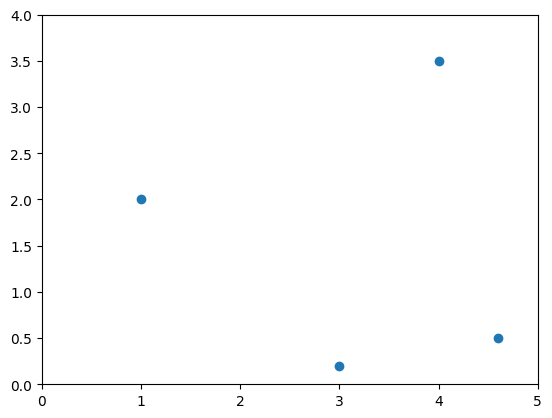

In [48]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.show()

Since the vectors are ordered, you can see the matrix as a path and represent it with connected dots:

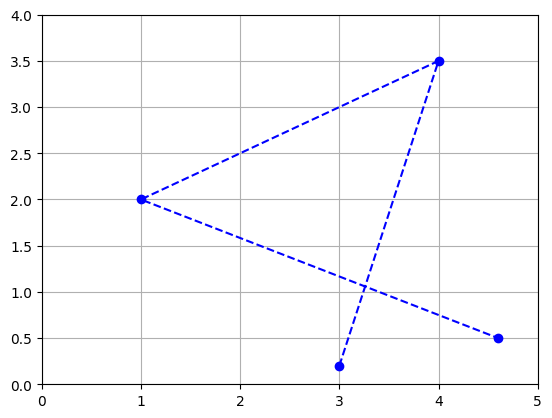

In [49]:
plt.plot(x_coords_P, y_coords_P, "bo")
plt.plot(x_coords_P, y_coords_P, "b--")
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

Or you can represent it as a polygon: matplotlib's **Polygon** class expects an $n \times 2$ NumPy array, not a $2 \times n$ array, so we just need to give it $P^T$:

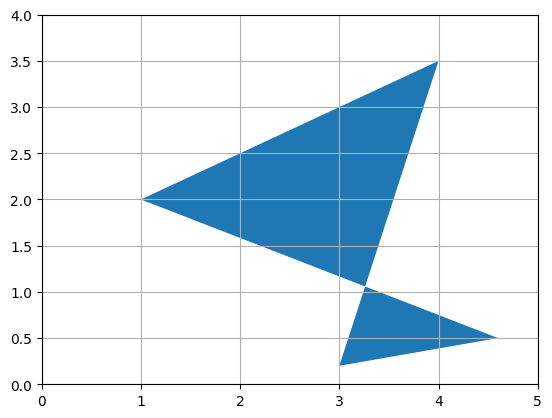

In [50]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

### Determinant
The determinant of a square matrix $M$, noted $\det(M)$ or $\det M$ or $|M|$ is a value that can be calculated from its elements $(M_{i,j})$ using various equivalent methods. One of the simplest methods is this recursive approach:

$|M| = M_{1,1}\times|M^{(1,1)}| - M_{2,1}\times|M^{(2,1)}| + M_{3,1}\times|M^{(3,1)}| - M_{4,1}\times|M^{(4,1)}| + \cdots ± M_{n,1}\times|M^{(n,1)}|$

Where $M^{(i,j)}$ is the matrix $M$ without row $i$ and column $j$.

For example, let's calculate the determinant of the following $3 \times 3$ matrix:

$M = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 0
\end{bmatrix}$

Using the method above, we get:

$|M| = 1 \times \left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right |
     - 2 \times \left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right |
     + 3 \times \left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right |$

Now we need to compute the determinant of each of these $2 \times 2$ matrices (these determinants are called **minors**):

$\left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right | = 5 \times 0 - 6 \times 8 = -48$

$\left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right | = 4 \times 0 - 6 \times 7 = -42$

$\left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right | = 4 \times 8 - 5 \times 7 = -3$

Now we can calculate the final result:

$|M| = 1 \times (-48) - 2 \times (-42) + 3 \times (-3) = 27$

To get the determinant of a matrix, you can call NumPy's **det()** function in the numpy.linalg module.

In [51]:
M = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ])
print(la.det(M))

27.0


### Trace

The trace of a square matrix $M$, noted $tr(M)$ is the sum of the values on its main diagonal. For example:

In [52]:
D = np.array([
        [100, 200, 300],
        [ 10,  20,  30],
        [  1,   2,   3],
    ])
np.trace(D)

123

The trace has a number of properties that make it useful in many areas:

$tr(A + B) = tr(A) + tr(B)$

$tr(A \cdot B) = tr(B \cdot A)$

$tr(A \cdot B \cdot \cdots \cdot Y \cdot Z) = tr(Z \cdot A \cdot B \cdot \cdots \cdot Y)$

$tr(A^T \cdot B) = tr(A \cdot B^T) = tr(B^T \cdot A) = tr(B \cdot A^T) = \sum_{i,j}X_{i,j} \times Y_{i,j}$

### Singular Value Decomposition
It turns out that any $m \times n$ matrix $M$ can be decomposed into the dot product of three simple matrices:

- a rotation matrix $U$ (an $m \times m$ orthogonal matrix)
- a scaling & projecting matrix $\Sigma$ (an $m \times n$ diagonal matrix)
- and another rotation matrix $V^T$ (an $n \times n$ orthogonal matrix)

$M = U \cdot \Sigma \cdot V^{T}$

We can use **svd()** methods, note that it provides just a 1D array containing the diagonal values of $\Sigma$. To get the actual matrix $\Sigma$, we can use the **diag()** function.

In [53]:
V = np.array([
        [32, 43, 87],
        [62, 93, 63],
        [25, 68, 54],
    ])

U, S_diag, V_T = la.svd(V)
print(U)

[[-0.52978084 -0.82727215  0.18695734]
 [-0.69237323  0.549161    0.4680187 ]
 [-0.48984851  0.11850309 -0.86371607]]


In [54]:
S = np.diag(S_diag)
print(S)

[[182.24036071   0.           0.        ]
 [  0.          40.31794288   0.        ]
 [  0.           0.          15.22873635]]


let's check that $U \cdot \Sigma \cdot V^T$ is indeed equal to V:

In [55]:
print(U.dot(np.diag(S_diag)).dot(V_T))
print(V)

[[32. 43. 87.]
 [62. 93. 63.]
 [25. 68. 54.]]
[[32 43 87]
 [62 93 63]
 [25 68 54]]


## Geometric applications
We saw earlier that vector addition results in a geometric translation, vector multiplication by a scalar results in rescaling (zooming in or out, centered on the origin), and vector dot product results in projecting a vector onto another vector, rescaling and measuring the resulting coordinate.

Similarly, matrix operations have very useful geometric applications. Adding two matrices together is equivalent to adding all their vectors together:

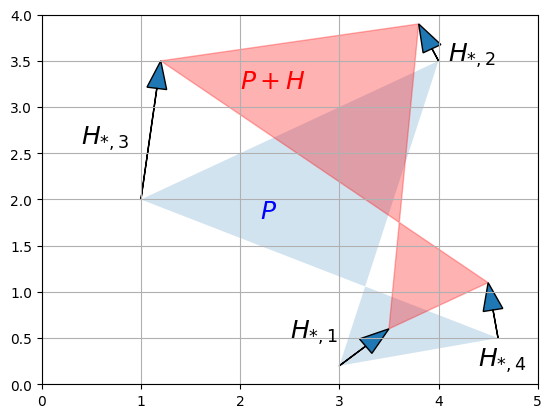

In [58]:
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector_2d(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

### Translations

If we add a matrix full of identical vectors, we get a simple geometric translation:

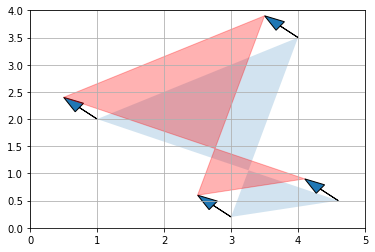

[[2.5 3.5 0.5 4.1]
 [0.6 3.9 2.4 0.9]]


In [61]:
H2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4]
    ])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(H2.T, P.T):
    plot_vector_2d(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

print(P_translated)

Although matrices can only be added together if they have the same size, NumPy allows adding a row vector or a column vector to a matrix: this is called **broadcasting**.

In [57]:
P + [[-0.5], [0.4]]  # same as P + H2, thanks to NumPy broadcasting

array([[2.5, 3.5, 0.5, 4.1],
       [0.6, 3.9, 2.4, 0.9]])

### Scaling
Multiplying a matrix by a scalar results in all its vectors being multiplied by that scalar, so unsurprisingly, the geometric result is a rescaling of the entire figure.

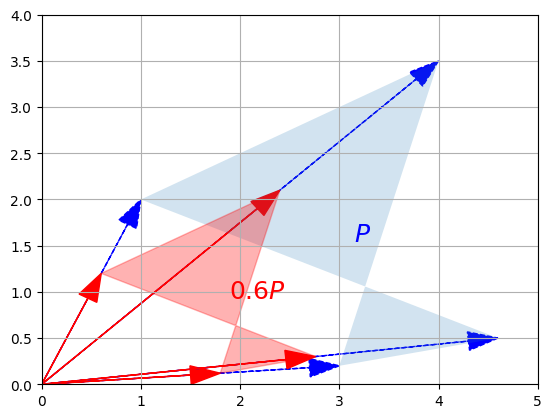

In [59]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector_2d(vector_before, color="blue", linestyle="--")
            plot_vector_2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

### Projection onto an axis
Matrix multiplication is more complex to visualize, but it is also the most powerful tool in the box.

Let's start simple, by defining a 1x2 matrix 

$U = \begin{bmatrix} 1 & 0 \end{bmatrix}$

This row vector is just the horizontal unit vector

In [60]:
U = np.array([[1, 0]])

Now let's look at the dot product $UP$:

In [61]:
U.dot(P)

array([[3. , 4. , 1. , 4.6]])

These are the horizontal coordinates of the vectors in P. In other words, we just projected P onto the horizontal axis:

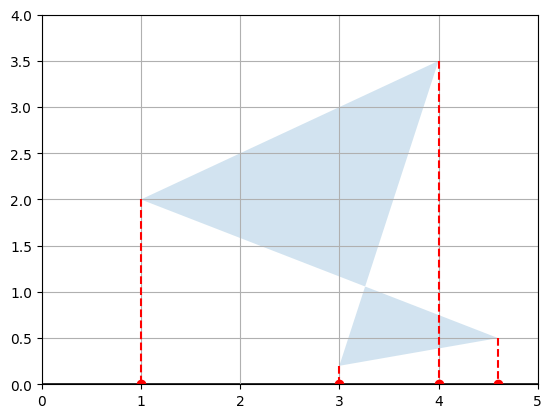

In [62]:
def plot_projection(U, P):
    U_P = U.dot(P)
    
    axis_end = 100 * U
    plot_vector_2d(axis_end[0], color="black")

    plt.gca().add_artist(Polygon(P.T, alpha=0.2))
    for vector, proj_coordinate in zip(P.T, U_P.T):
        proj_point = proj_coordinate * U
        plt.plot(proj_point[0][0], proj_point[0][1], "ro")
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]], "r--")

    plt.axis([0, 5, 0, 4])
    plt.grid()
    plt.show()

plot_projection(U, P)

We can actually project on any other axis by just replacing $U$ with any other unit vector. For example, let's project on the axis that is at a 30° angle above the horizontal axis:

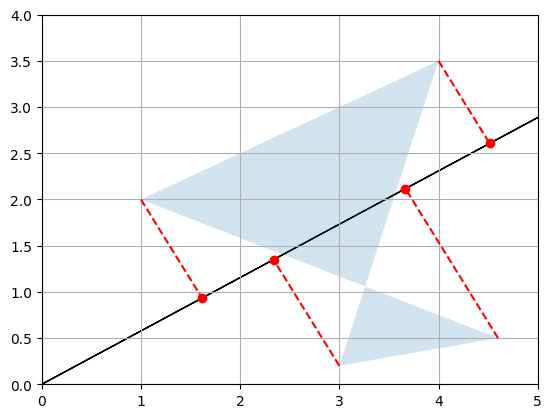

In [63]:
angle30 = 30 * np.pi / 180  # angle in radians
U_30 = np.array([[np.cos(angle30), np.sin(angle30)]])

plot_projection(U_30, P)

Good! Remember that the dot product of a unit vector and a matrix basically performs a projection on an axis and gives us the coordinates of the resulting points on that axis.

### Rotation
Now let's create a $2 \times 2$ matrix $V$ containing two unit vectors that make 30° and 120° angles with the horizontal axis:

$V = \begin{bmatrix} \cos(30°) & \sin(30°) \\ \cos(120°) & \sin(120°) \end{bmatrix}$

In [64]:
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])
print(V)

[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]


Let's look at the product $VP$:

In [65]:
V.dot(P)

array([[ 2.69807621,  5.21410162,  1.8660254 ,  4.23371686],
       [-1.32679492,  1.03108891,  1.23205081, -1.8669873 ]])

The first row is equal to $V_{1,*} P$, which is the coordinates of the projection of $P$ onto the 30° axis, as we have seen above. The second row is $V_{2,*} P$, which is the coordinates of the projection of $P$ onto the 120° axis. So basically we obtained the coordinates of $P$ after rotating the horizontal and vertical axes by 30° (or equivalently after rotating the polygon by -30° around the origin)! Let's plot $VP$ to see this:

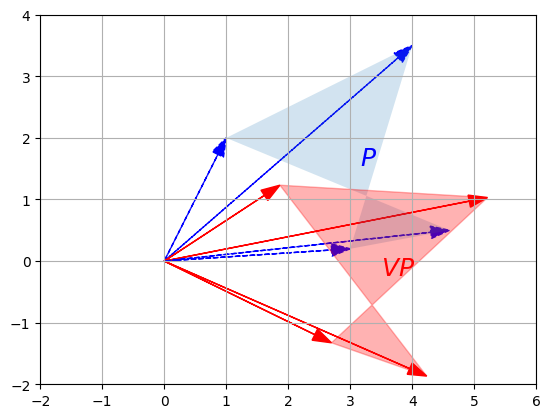

In [66]:
P_rotated = V.dot(P)
plot_transformation(P, P_rotated, "$P$", "$VP$", [-2, 6, -2, 4], arrows=True)
plt.show()

Matrix $V$ is called a **rotation matrix**.

### Linear transformation
More generally, any linear transformation $f$ that maps n-dimensional vectors to m-dimensional vectors can be represented as an $m \times n$ matrix. For example, say $\textbf{u}$ is a 3-dimensional vector:

$\textbf{u} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$

and $f$ is defined as:

$f(\textbf{u}) = \begin{pmatrix}
ax + by + cz \\
dx + ey + fz
\end{pmatrix}$

This transormation $f$ maps 3-dimensional vectors to 2-dimensional vectors in a linear way (ie. the resulting coordinates only involve sums of multiples of the original coordinates). We can represent this transformation as matrix $F$:

$F = \begin{bmatrix}
a & b & c \\
d & e & f
\end{bmatrix}$

Now, to compute $f(\textbf{u})$ we can simply do a matrix multiplication:

$f(\textbf{u}) = F \textbf{u}$

If we have a matric $G = \begin{bmatrix}\textbf{u}_1 & \textbf{u}_2 & \cdots & \textbf{u}_q \end{bmatrix}$, where each $\textbf{u}_i$ is a 3-dimensional column vector, then $FG$ results in the linear transformation of all vectors $\textbf{u}_i$ as defined by the matrix $F$:

$FG = \begin{bmatrix}f(\textbf{u}_1) & f(\textbf{u}_2) & \cdots & f(\textbf{u}_q) \end{bmatrix}$

To summarize, the matrix on the left hand side of a dot product specifies what linear transormation to apply to the right hand side vectors. We have already shown that this can be used to perform projections and rotations, but any other linear transformation is possible.

### Inverse transformation
Now that we understand that a matrix can represent any linear transformation, a natural question is: can we find a transformation matrix that reverses the effect of a given transformation matrix $F$? The answer is yes… sometimes! When it exists, such a matrix is called the **inverse** of F, and it is noted $F^{-1}$.

NumPy provides the **inv()** function to compute a matrix's inverse.

For example, the rotation mapping have inverse transformations.

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


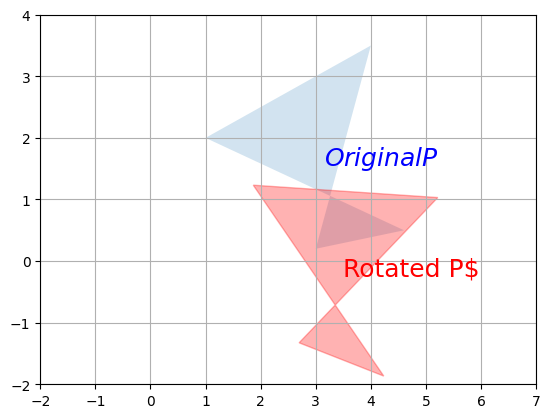

In [67]:
V_inv = la.inv(V)
print(V_inv)

P_rotated = V.dot(P)
plot_transformation(P, P_rotated, "$Original P$", "Rotated P$", [-2, 7, -2, 4])
plt.show()

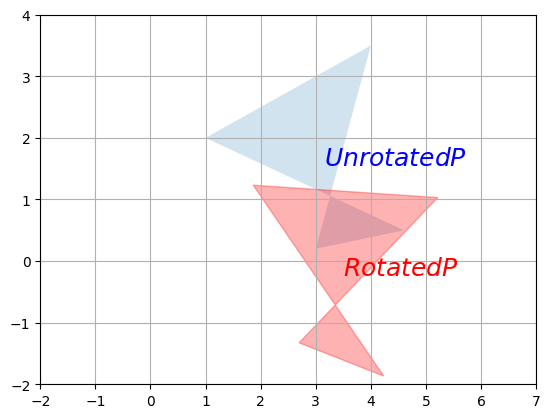

In [68]:
P_unrotated = V_inv.dot(P_rotated)
plot_transformation(P_unrotated, P_rotated, "$Unrotated P$", "$Rotated P$", [-2, 7, -2, 4])
plt.show()

We applied a rotation mapping on $P$, just like we did before, but then we applied a second transformation to the result, and this had the effect of coming back to the original $P$. The second transformation is the inverse of the first one.

Only square matrices can be inversed. This makes sense when you think about it: if you have a transformation that reduces the number of dimensions, then some information is lost and there is no way that you can get it back. Anyway, not all square matrices can be inverted.

For example, consider this transformation matrix:

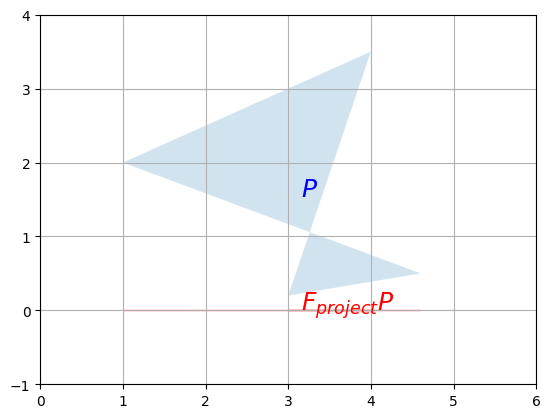

In [70]:
F_project = np.array([
        [1, 0],
        [0, 0]
    ])

plot_transformation(P, F_project.dot(P), "$P$", "$F_{project}  P$", axis=[0, 6, -1, 4])
plt.show()

This transformation matrix performs a projection onto the horizontal axis. Our polygon gets entirely flattened out so some information is entirely lost and it is impossible to go back to the original polygon using a linear transformation. In other words, $F_{project}$ has no inverse. Such a square matrix that cannot be inversed is called a **singular matrix** (aka degenerate matrix). If we ask NumPy to calculate its inverse, it raises an exception.

In [71]:
try:
    la.inv(F_project)
except la.LinAlgError as e:
    print("LinAlgError:", e)

LinAlgError: Singular matrix


As you might expect, the dot product of a matrix by its inverse results in the identity matrix:

$M \cdot M^{-1} = M^{-1} \cdot M = I$

This makes sense since doing a linear transformation followed by the inverse transformation results in no change at all.

Another way to express this is that the inverse of the inverse of a matrix $M$ is $M$ itself:

$((M)^{-1})^{-1} = M$

In [72]:
print(V)
print(V.dot(la.inv(V)))
print(la.inv(la.inv(V)))

[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]
[[1.00000000e+00 7.43708407e-18]
 [7.78224034e-17 1.00000000e+00]]
[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]


Finally, a square matrix $H$ whose inverse is its own transpose is an **orthogonal matrix**:

$H^{-1} = H^T$

Therefore:

$H \cdot H^T = H^T \cdot H = I$

It corresponds to a transformation that preserves distances, such as rotations and reflections, and combinations of these, but not scaling (or other transformation like shearing or squeezing).

In [73]:
V.dot(V.T)

array([[1.00000000e+00, 1.73970538e-16],
       [1.73970538e-16, 1.00000000e+00]])

We can use the determinant to determine whether a square matrix can be inversed or not: if the determinant is equal to 0, then the matrix cannot be inversed (it is a singular matrix), and if the determinant is not 0, then it can be inversed.

For example, let's compute the determinant for the $F_{project}$ matrix that we defined earlier:

In [74]:
la.det(F_project)

0.0

That's right, $F_{project}$ is singular, as we saw earlier.

The determinant can also be used to measure how much a linear transformation affects surface areas: for example, the projection matrix $F_{project}$ completely flatten the polygon $P$, until its area is zero. This is why the determinant of these matrices is 0. The rotation mapping modified the position of the polygon, but it did not affect its surface area, which is why the determinant is 1. 

In [78]:
la.det(V)

1.0

What about a scaling matrix?

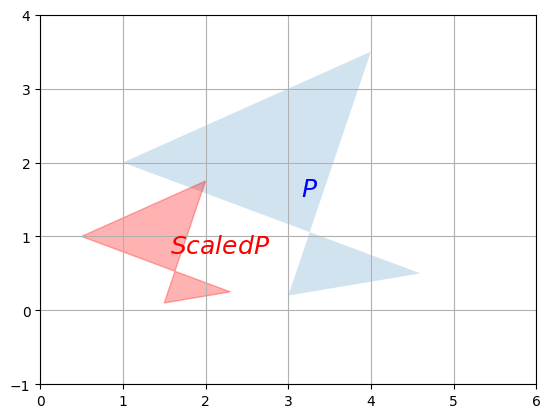

In [76]:
F_scale = np.array([
        [0.5, 0],
        [0, 0.5]
    ])
plot_transformation(P, F_scale.dot(P), "$P$", "$Scaled P$", axis=[0, 6, -1, 4])
plt.show()

In [80]:
la.det(F_scale)

0.25

We rescaled the polygon by a factor of 1/2 on both vertical and horizontal axes so the surface area of the resulting polygon is 1/4 of the original polygon. 

### Composing linear transformations
Several linear transformations can be chained simply by performing multiple dot products in a row. For example, we can try to perform a scaling mapping followed by a rotation mapping:

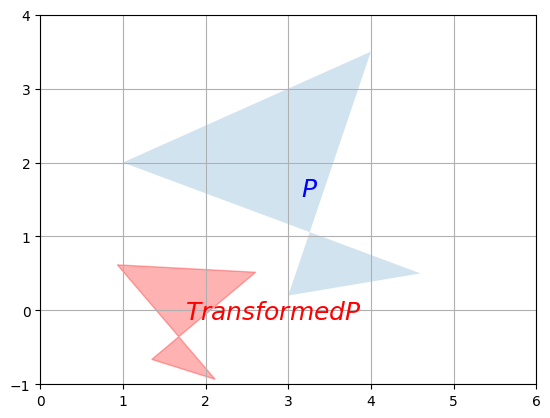

In [77]:
P_moved_and_rotated = F_scale.dot(V.dot(P))

plot_transformation(P, P_moved_and_rotated, "$P$", "$Transformed P$", axis=[0, 6, -1, 4])
plt.show()

Since the dot product is associative, the following code is equivalent:

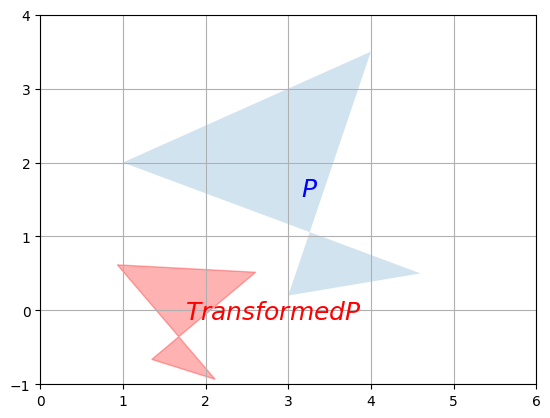

In [78]:
P_moved_and_rotated = (F_scale.dot(V)).dot(P)

plot_transformation(P, P_moved_and_rotated, "$P$", "$Transformed P$", axis=[0, 6, -1, 4])
plt.show()

If we are going to perform this composition of linear transformations more than once, we might as well save the composition matrix like this:

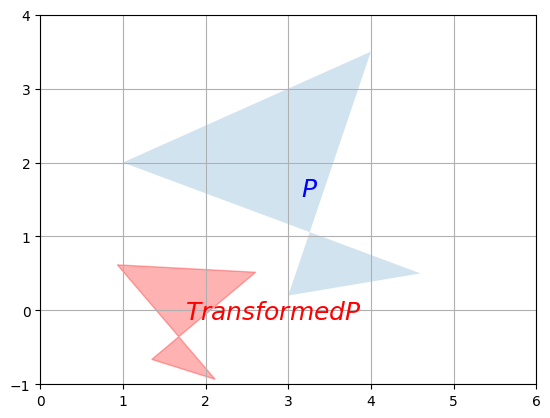

In [79]:
F_scale_rotate = F_scale.dot(V)
P_moved_and_rotated = F_scale_rotate.dot(P)

plot_transformation(P, P_moved_and_rotated, "$P$", "$Transformed P$", axis=[0, 6, -1, 4])
plt.show()

From now on we can perform both transformations in just one dot product, which can lead to a very significant performance boost.

What if you want to perform the inverse of this double transformation? Well, if you rotate and then you scale, and you want to undo what you have done, it should be obvious that you should unscale first and then unrotate. In more mathematical terms, given two invertible (nonsingular) matrices $Q$ and $R$:

$(Q  R)^{-1} = R^{-1} Q^{-1}$

In [80]:
la.inv(F_scale_rotate) == la.inv(V).dot(la.inv(F_scale))

array([[ True,  True],
       [ True,  True]])

## Eigenvectors and eigenvalues
An **eigenvector** of a square matrix $M$ (also called a **characteristic vector**) is a non-zero vector that remains on the same line after transformation by the linear transformation associated with $M$. A more formal definition is any vector $v$ such that:

$M \cdot v = \lambda \times v$

Where $\lambda$ is a scalar value called the **eigenvalue** associated to the vector $v$.

NumPy's **eig()** function returns the list of unit eigenvectors and their corresponding eigenvalues for any square matrix. 

In [81]:
eigenvalues, eigenvectors = la.eig(F_scale)
print(eigenvalues)

[0.5 0.5]


In [82]:
print(eigenvectors)

[[1. 0.]
 [0. 1.]]
